In [1]:
import pyBigWig
import pandas as pd
import sys
sys.path.append('/home/hsher/rbp-maps/maps/')
from density.ReadDensity import ReadDensity
import os
from metadensity import *
from pybedtools import BedTool
import matplotlib.pyplot as plt
basedir = '/home/hsher/seqdata/eclip_raw/'

# Load encode metadata
I have precompiled list of uID and the .bam, .bigWig files in the following dataframe.

In [2]:
# load IDs
encode_data = pd.read_pickle('~/projects/eclip_encode_id.pickle')
eclip_bam = pd.read_csv('/home/hsher/projects/RBP_annot/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0)

# join data
encode_data = pd.merge(eclip_bam[['uID', 'RBP', 'Cell line']], encode_data, left_on = ['RBP', 'Cell line'], right_on = ['RBP', 'cell_line'])

In [3]:
encode_data.head()

,uID,RBP,Cell line,bam_0,minus_0,plus_0,bam_1,minus_1,plus_1,control experiment,cell_line,bam_control,minus_control,plus_control
0,203,HNRNPC,HepG2,ENCFF162FHQ.bam,ENCFF891BFD.bigWig,ENCFF930WRN.bigWig,ENCFF630YNF.bam,ENCFF406EWT.bigWig,ENCFF774JCA.bigWig,ENCSR497ANA,HepG2,ENCFF885KNL.bam,ENCFF109ZAY.bigWig,ENCFF533EON.bigWig
1,204,RBFOX2,HepG2,ENCFF239CML.bam,ENCFF752HWB.bigWig,ENCFF240NTF.bigWig,ENCFF170YQV.bam,ENCFF177ZTF.bigWig,ENCFF274QRL.bigWig,ENCSR799EKA,HepG2,ENCFF515BTB.bam,ENCFF582MIQ.bigWig,ENCFF139QQP.bigWig
2,205,IGF2BP1,HepG2,ENCFF427IMN.bam,ENCFF026VOV.bigWig,ENCFF370PYL.bigWig,ENCFF777OWL.bam,ENCFF725BUB.bigWig,ENCFF398TNM.bigWig,ENCSR205ZCE,HepG2,ENCFF032OPL.bam,ENCFF546UAX.bigWig,ENCFF444KWD.bigWig
3,206,HNRNPK,HepG2,ENCFF553XCL.bam,ENCFF494CVZ.bigWig,ENCFF078NBU.bigWig,ENCFF198ISB.bam,ENCFF234AEU.bigWig,ENCFF404YRY.bigWig,ENCSR354KAS,HepG2,ENCFF019JFZ.bam,ENCFF748LOT.bigWig,ENCFF377LKH.bigWig
4,209,SRSF7,HepG2,ENCFF558CNE.bam,ENCFF379FWK.bigWig,ENCFF663IBZ.bigWig,ENCFF743ZXA.bam,ENCFF550GIT.bigWig,ENCFF924VSG.bigWig,ENCSR629MQN,HepG2,ENCFF160TWL.bam,ENCFF678FIY.bigWig,ENCFF826HSS.bigWig


`minus_0` is the bigWig file for `minus` strand for replicate `0`. The files are in `/home/hsher/seqdata/eclip_raw`. You don't need to specify all of them. The eCLIP object will take care of them.

# load RBPs into eCLIP object

I build an eCLIP object that will connect all .bam, .bigWig and .bed (for IDR peaks, individual peaks) together. All you need to do is point a row of the previous dataframe, and use `RBP_centric_approach()` to compute the regions for metagene, and find positive (transcripts with IDR) and negative (transcript w/o any peaks) examples. Building the object will take a while (~1 min) since a lot of I/O.

In [4]:
HNRNPC = eCLIP()
HNRNPC.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'HNRNPC')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


In [5]:
RPS3 = eCLIP()
RPS3.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'RPS3')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


In [6]:
RBFOX2 = eCLIP()
RBFOX2.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'RBFOX2')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


In [7]:
LIN28B = eCLIP()
LIN28B.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'LIN28B')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


## (Optional) Let's take a look what's inside eCLIP objects

In [8]:
print(HNRNPC.name, 'is my name;', HNRNPC.uID, 'is my uID.')

HNRNPC is my name; 203 is my uID.


In [9]:
HNRNPC.rep1 # this the the `ReadDensity` object containing the + and - strand of the replicate 1. Same work for .`rep2`

In [10]:
HNRNPC.ctrl # we have control too

In [11]:
HNRNPC.rep1.values('chr1', 100, 120, '+') # to extract some regions

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [12]:
HNRNPC.idr # points to the IDR peaks

<BedTool(/home/hsher/seqdata/eclip_bed/sorted/203.01v02.IDR.out.0102merged.bed.blacklist_removed.bed.narrowPeak.bed)>

In [13]:
HNRNPC.peak1 # peak for rep 1

<BedTool(/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_FINALforpapers_20180205/hg38/203_01.basedon_203_01.peaks.l2inputnormnew.bed.compressed.bed.blacklist_removed.bed)>

In [14]:
HNRNPC.idr_transcript # transcripts regions with IDR peaks (those as positive example)

<BedTool(/scratch/hsher/21785562.tscc-mgr7.local/pybedtools.cz0ojrsz.tmp)>

In [15]:
HNRNPC.no_peak # transcripts w/o any peak

<BedTool(/scratch/hsher/21785562.tscc-mgr7.local/pybedtools.uvm60bek.tmp)>

In [16]:
HNRNPC.idr_metagene.keys() # `.idr_metagene` is an dictionary, key = transcript id; value = `Metagene object`

dict_keys(['ENST00000655486.1', 'ENST00000435064.5', 'ENST00000400809.8', 'ENST00000344843.12', 'ENST00000673477.1', 'ENST00000617444.5', 'ENST00000610897.4', 'ENST00000378536.5', 'ENST00000378156.9', 'ENST00000377705.6', 'ENST00000377577.10', 'ENST00000377482.10', 'ENST00000400908.7', 'ENST00000635687.1', 'ENST00000361311.4', 'ENST00000240185.7', 'ENST00000614757.4', 'ENST00000376810.5', 'ENST00000376030.7', 'ENST00000480945.6', 'ENST00000412962.4', 'ENST00000375436.9', 'ENST00000361221.8', 'ENST00000264202.8', 'ENST00000312239.10', 'ENST00000264211.12', 'ENST00000308271.14', 'ENST00000374695.8', 'ENST00000302271.11', 'ENST00000324856.13', 'ENST00000618852.5', 'ENST00000247087.10', 'ENST00000398958.6', 'ENST00000413987.1', 'ENST00000542507.5', 'ENST00000642260.1', 'ENST00000257075.9', 'ENST00000373477.8', 'ENST00000373475.10', 'ENST00000257118.5', 'ENST00000650449.1', 'ENST00000314607.11', 'ENST00000354618.10', 'ENST00000567887.5', 'ENST00000447388.7', 'ENST00000372597.5', 'ENST000003

In [17]:
example_metagene = HNRNPC.idr_metagene['ENST00000655486.1'] # take a look what is in metagene

In [18]:
print(example_metagene.chrom, example_metagene.start, example_metagene.stop, example_metagene.strand)

chr1 1221736 1221785 -


In [19]:
print(example_metagene.five_utr, example_metagene.exon)

set() {(1217511, 1217688), (1223243, 1223357), (1228467, 1228793), (1223831, 1223968), (1218768, 1218927), (1218457, 1218633)}


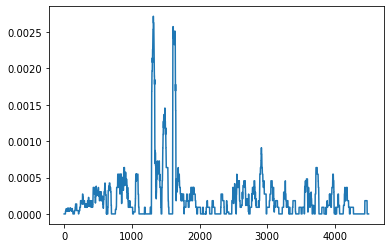

In [20]:
# access to individual metagene's density over here 203 is uID, replicate 1, introns
plt.plot(example_metagene.densities['203']['rep1']['intron'])

In [21]:
# similarly we have HNRNPC.neg_metagene for negative examples
type(HNRNPC.neg_metagene)

dict

# Visualize metadensity individually

In [22]:
import matplotlib.gridspec as gridspec

def plot_meta_density(eCLIP, five_utr_len=5000, three_utr_len=10000, intron_len = 150000, exon_len = 10000, ymax = 0.03, logy = False, example = 'positive'):
    ''' line plot of metadensity'''
    fig2 = plt.figure(figsize = (10, 5))
    spec2 = gridspec.GridSpec(ncols=9, nrows=2, figure=fig2)
    
    # axis
    utr_five_1 = fig2.add_subplot(spec2[0, 0])
    exon_1 = fig2.add_subplot(spec2[0, 1:3], sharey = utr_five_1)
    intron_1 = fig2.add_subplot(spec2[0, 3:8], sharey = utr_five_1)
    utr_three_1 = fig2.add_subplot(spec2[0, 8:], sharey = utr_five_1)
    utr_five_2 = fig2.add_subplot(spec2[1, 0], sharey = utr_five_1)
    exon_2 = fig2.add_subplot(spec2[1, 1:3], sharey = utr_five_1)
    intron_2 = fig2.add_subplot(spec2[1, 3:8], sharey = utr_five_1)
    utr_three_2 = fig2.add_subplot(spec2[1, 8:], sharey = utr_five_1)
    
    # trun off yticklabels/ xticklabels
    _ = [plt.setp(ax.get_yticklabels(), visible=False) for ax in [exon_1, exon_2, intron_1, intron_2, utr_three_1, utr_three_2]]
    _ = [plt.setp(ax.get_xticklabels(), visible=False) for ax in [utr_five_1, exon_1, intron_1, utr_three_1]]
    
    # set xlim for exon, intron, utr's maximal length
    _ = [ax.set_xlim(xmin = 0, xmax = three_utr_len) for ax in [utr_three_1, utr_three_2]]
    _ = [ax.set_xlim(xmin = 0, xmax = five_utr_len) for ax in [utr_five_1, utr_five_2]]
    _ = [ax.set_xlim(xmin = 0, xmax = intron_len) for ax in [intron_1, intron_2]]
    _ = [ax.set_xlim(xmin = 0, xmax = exon_len) for ax in [exon_1, exon_2]]
    
    # set ylim for peak height
    _ = [ax.set_ylim(ymin = 0, ymax = ymax) for ax in [utr_five_1, utr_five_2]]
    if logy:
        _ = [ax.set_yscale('log') for ax in [utr_five_1, utr_five_2]]
    
    # plot positive or negative example
    if example == 'positive':
        metagenes = eCLIP.idr_metagene.values()
    else:
        metagenes = eCLIP.neg_metagene.values()
    for m in metagenes:
        # metagene --> uID --> rep1/rep2 --> five_utr/intron/exon/three_utr
        
        
        utr_five_1.plot(m.densities[eCLIP.uID]['rep1']['five_utr'], color = 'grey', alpha = 0.3)
        utr_five_2.plot(m.densities[eCLIP.uID]['rep2']['five_utr'], color = 'grey', alpha = 0.3)
        utr_five_1.set_title('5\' UTR')
    
        exon_1.plot(m.densities[eCLIP.uID]['rep1']['exon'], color = 'grey', alpha = 0.3)
        exon_2.plot(m.densities[eCLIP.uID]['rep2']['exon'], color = 'grey', alpha = 0.3)
        exon_1.set_title('exon')
    
        intron_1.plot(m.densities[eCLIP.uID]['rep1']['intron'], color = 'grey', alpha = 0.3)
        intron_2.plot(m.densities[eCLIP.uID]['rep2']['intron'], color = 'grey', alpha = 0.3)
        intron_1.set_title('intron')
    
        utr_three_1.plot(m.densities[eCLIP.uID]['rep1']['three_utr'], color = 'grey', alpha = 0.3)
        utr_three_2.plot(m.densities[eCLIP.uID]['rep2']['three_utr'], color = 'grey', alpha = 0.3)
        utr_three_1.set_title('3\' UTR')
    plt.suptitle('{} : {} examples'.format(eCLIP.name,example))

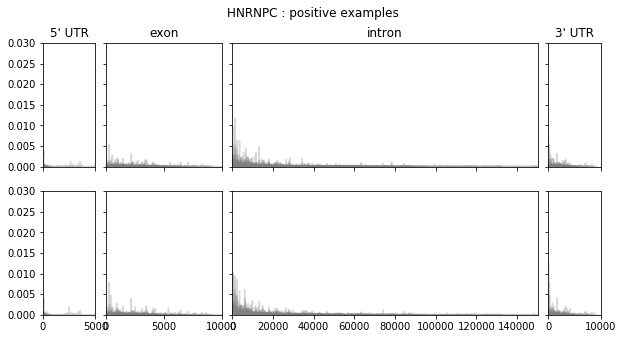

In [23]:
plot_meta_density(HNRNPC)

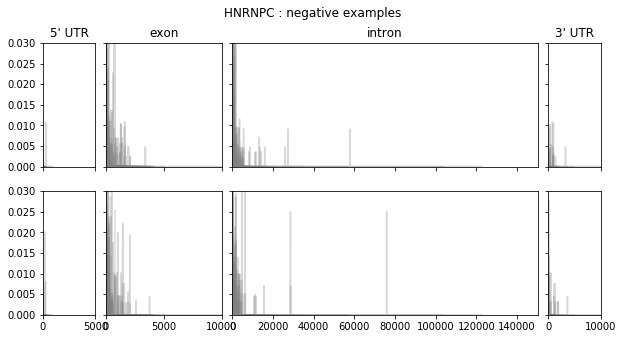

In [24]:
plot_meta_density(HNRNPC, example = 'negative')

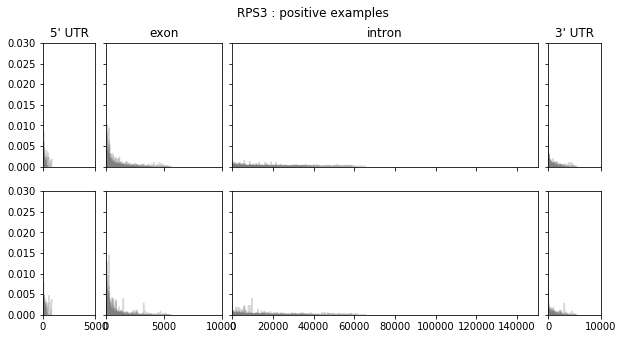

In [25]:
plot_meta_density(RPS3)

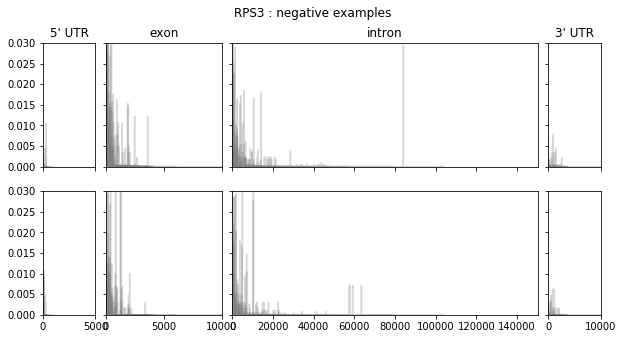

In [26]:
plot_meta_density(RPS3, example = 'negative')

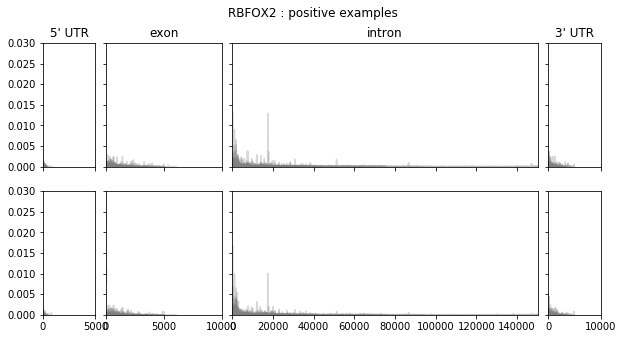

In [27]:
plot_meta_density(RBFOX2)

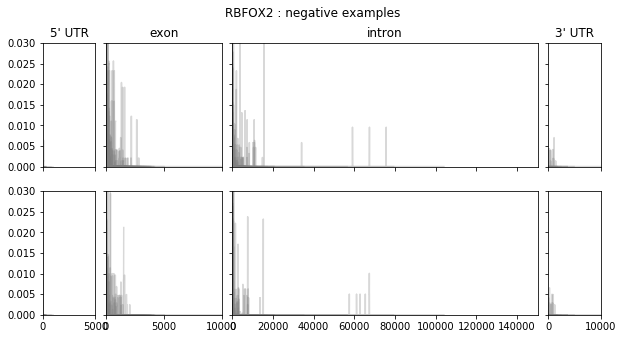

In [28]:
plot_meta_density(RBFOX2, example = 'negative')

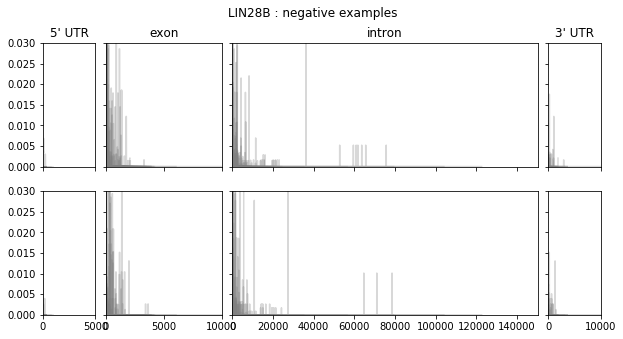

In [29]:
plot_meta_density(LIN28B, example = 'negative')

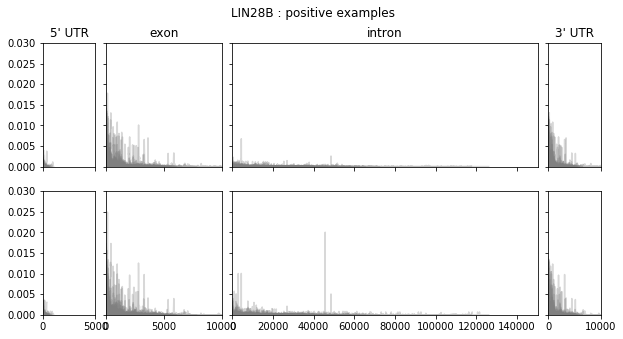

In [30]:
plot_meta_density(LIN28B)

# Every metagene has a different length of intron/exon/utrs.

`eCLIP.get_density_array()` helps you align them (by padding to right/left`

In [31]:
_ = [e.get_density_array() for e in [HNRNPC, RPS3, RBFOX2, LIN28B]]

In [32]:
# access positive example, in 5'UTR, align to the right, replicate 1; the length of 5'UTR is set to 500; with total 114 examples
# 500 b.p. downstream to the start of 5'UTR
HNRNPC.density_array['positive', 'five_utr', 'left', 'rep1'].shape

(114, 500)

In [33]:
# 500 b.p. upstream to the end of 5'UTR in negative examples
HNRNPC.density_array['negative', 'five_utr', 'right', 'rep1'].shape

(200, 500)

# Calculate probability distribution

`pos_spec_bind_strength(eCLIP)` does that

In [34]:
HNRNPC_prob = pos_spec_bind_strength(HNRNPC)
RPS3_prob = pos_spec_bind_strength(RPS3)
RBFOX2_prob = pos_spec_bind_strength(RBFOX2)
LIN28B_prob = pos_spec_bind_strength(LIN28B)

In [35]:
# into 20 bins, 500 b.p. downstream to the start of 5'UTR
HNRNPC_prob['positive', 'five_utr', 'left', 'rep1'].shape

(20, 500)

In [36]:
import seaborn as sns
def plot_binding_strength(eCLIP, eCLIP_prob, align, example, rep):
        fig2 = plt.figure(figsize = (20, 5))
        spec2 = gridspec.GridSpec(ncols=10, nrows=1, figure=fig2)
 
        # axis
        utr_five = fig2.add_subplot(spec2[0, 0])
        exon = fig2.add_subplot(spec2[0, 1:3], sharey = utr_five)
        intron = fig2.add_subplot(spec2[0, 3:8], sharey = utr_five)
        utr_three = fig2.add_subplot(spec2[0, 8:9], sharey = utr_five)
        cb = fig2.add_subplot(spec2[0, 9:])
        
        # trun off yticklabels/ xticklabels
        _ = [plt.setp(ax.get_yticklabels(), visible=False) for ax in [exon, intron,utr_three]]
        
        f = eCLIP_prob[example, 'five_utr', align, rep]
        e = eCLIP_prob[example, 'exon', align, rep]
        i = eCLIP_prob[example, 'intron', align, rep]
        t = eCLIP_prob[example, 'three_utr', align, rep]
        
        
        # get vmax, vmin\n",
        #vmax = np.log(min([np.max(f), np.max(e), np.max(i), np.max(t)]))\n",
        vmax = np.log(1)
        #vmin = np.log(max([np.min(f), np.min(e), np.min(i), np.min(t)]))\n",
        vmin = np.log(0.001)
        
       # greyscale cmap\n",
        cm = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap = True)
        
        # plot\n",
        sns.heatmap(np.log(i[1:, :]), cmap=cm, ax = intron, cbar = False, vmin = vmin, vmax = vmax) # don't plot bin 0, no information\n",
        sns.heatmap(np.log(e[1:, :]), cmap=cm, ax = exon, cbar = False, vmin = vmin, vmax = vmax)
        sns.heatmap(np.log(f[1:, :]), cmap=cm, ax = utr_five, cbar = False, vmin = vmin, vmax = vmax)
        sns.heatmap(np.log(t[1:, :]), cmap=cm, ax = utr_three, cbar_ax = cb, vmin = vmin, vmax = vmax)
        
        # set label\n",
        cb.set_ylabel('log probability')
        utr_five.set_ylabel('density bins')
        utr_five.set_yticklabels(np.arange(1,f.shape[0]))
        
        # set x label
        if align == 'right':
            _ = [ax.set_xticklabels(np.arange(-ma.shape[1], 0)) for ax, ma in zip([utr_five, exon, intron, utr_three], [f,e,i,t])]
        
        # revert yaxis\n",
        utr_five.invert_yaxis()
        
        # set title\n",
        intron.set_title('intron')
        exon.set_title('exon')
        utr_five.set_title('5\'UTR')
        utr_three.set_title('3\'UTR')
        
        # add name\n",
        plt.suptitle('{}: {} example, align - {}, ({})'.format(eCLIP.name, example, align, rep))

# Do two reps look the same (density probability distribution)

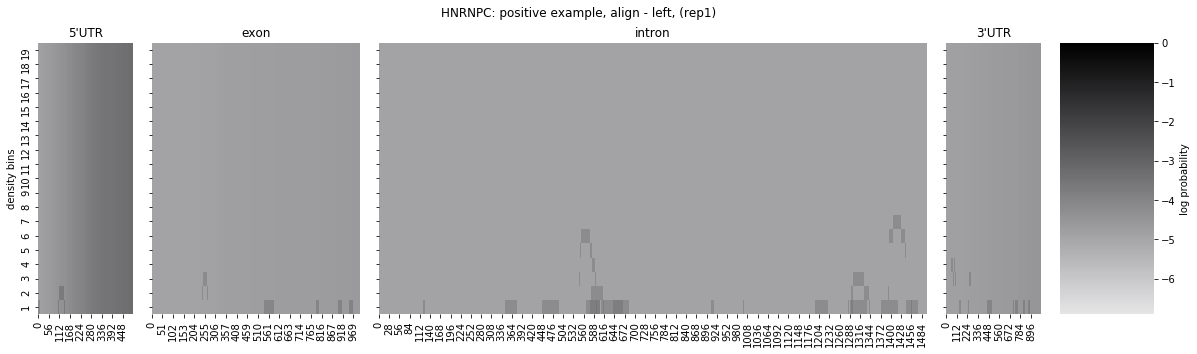

In [37]:
plot_binding_strength(HNRNPC,HNRNPC_prob, 'left','positive', 'rep1' )

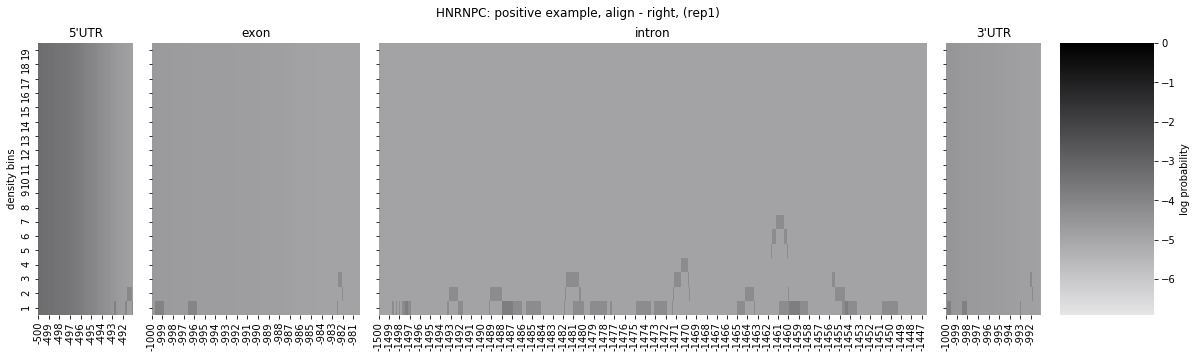

In [38]:
plot_binding_strength(HNRNPC,HNRNPC_prob, 'right','positive', 'rep1' )

In [39]:
## consistency by scatter plot
def consistency(eclip_prob, name):
    f,ax = plt.subplots(1,2)
    colors = dict(zip(['positive', 'negative'], ['maroon', 'seagreen']))
    i = 0
    for e in ['positive', 'negative']:
        for f in ['five_utr', 'exon', 'intron', 'three_utr']:
            for a in ['left', 'right']:
                ax[i].scatter(eclip_prob[e, f, a, 'rep1'].ravel(), eclip_prob[e, f, a, 'rep2'].ravel(), color = colors[e], label = e, alpha = 0.3)
        
        ax[i].set_xlabel('rep1 prob')
        ax[i].set_ylabel('rep2 prob')
        ax[i].set_title(e)
        i+=1
    plt.suptitle(name)
    plt.tight_layout()
    #plt.legend(loc = 'right')
    #plt.yscale('log')
    #plt.xscale('log')

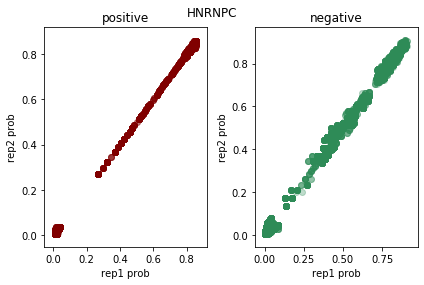

In [40]:
consistency(HNRNPC_prob, 'HNRNPC')

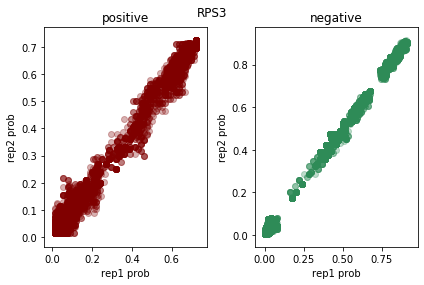

In [41]:
consistency(RPS3_prob, 'RPS3')

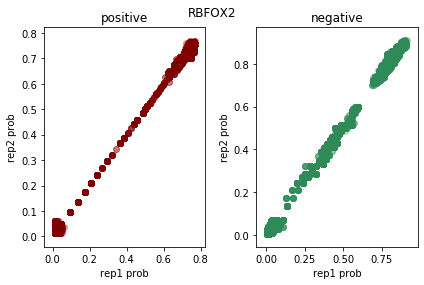

In [42]:
consistency(RBFOX2_prob, 'RBFOX2')

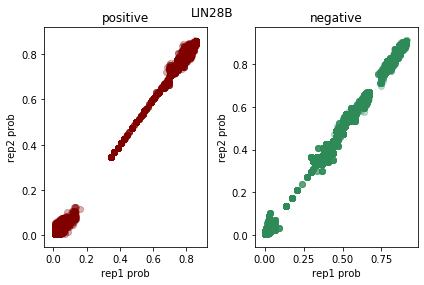

In [43]:
consistency(LIN28B_prob, 'LIN28B')

# What is the probability distribution of densities?

In [44]:
def plot_dist(eCLIP, name):
    f,ax = plt.subplots(1,4, figsize = (8,3))
    i=0
    for example in ['positive', 'negative']:
        all_den = []
        for align in ['left', 'right']:
            for rep in ['rep1','rep2']:
                for feature in ['five_utr', 'exon', 'intron', 'three_utr']:
                    all_den.append(eCLIP.density_array[example, feature, align, rep].ravel())
        d = np.concatenate(all_den)
        
        # replace 0 with second smallest value so that we can log
        d = d[~np.isnan(d)]
        
        d[d==0] = np.sort(np.unique(d))[1]
        print(np.min(d))
        ax[i].hist(d, bins = 50)
        ax[i+2].hist(np.log(d), bins = 50)
        ax[i].set_title(example)
        ax[i+2].set_title(example + 'log')
        ax[i].set_yscale('log')
        ax[i+2].set_yscale('log')
        i+=1
    ax[0].set_ylabel('% location')

    plt.suptitle('{} distriution'.format(name, example))
    return(d)

8.6242406468e-313
1.3425591955e-313


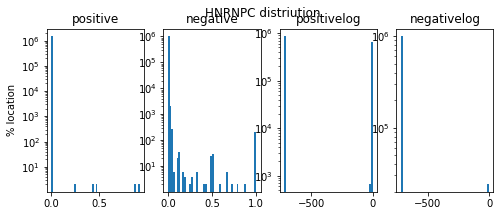

In [45]:
d = plot_dist(HNRNPC, 'HNRNPC')

6.547293657477836e-09
5.0153499272e-314


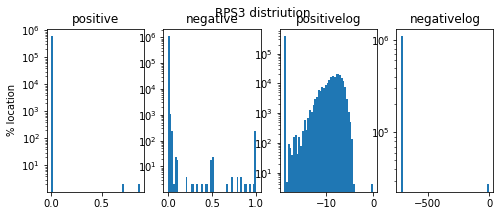

In [46]:
d = plot_dist(RPS3, 'RPS3')

3.51862658495e-313
2.1270068521e-313


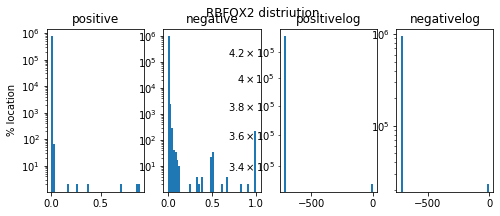

In [47]:
d = plot_dist(RBFOX2, 'RBFOX2')

2.500109474e-314
5.65751883766e-313


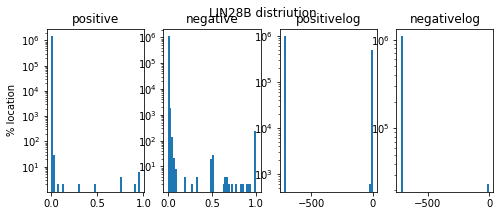

In [48]:
d = plot_dist(LIN28B, 'LIN28B')

# Get mean, std and median of density

In [49]:
def plot_mean_density(eCLIPs):
    ''' get a bunch of eCLIPs, plot their mean density'''
    fig2 = plt.figure(figsize = (20, 5))
    spec2 = gridspec.GridSpec(ncols=12, nrows=1, figure=fig2)
 
    # axis
    utr_five_lt = fig2.add_subplot(spec2[0, 0])
    utr_five_rt = fig2.add_subplot(spec2[0, 1], sharey = utr_five_lt)
    exon_lt = fig2.add_subplot(spec2[0, 2:4], sharey = utr_five_lt)
    exon_rt = fig2.add_subplot(spec2[0, 4:6], sharey = utr_five_lt)
    intron_lt = fig2.add_subplot(spec2[0, 6:8], sharey = utr_five_lt)
    intron_rt = fig2.add_subplot(spec2[0, 8:10], sharey = utr_five_lt)
    utr_three_lt = fig2.add_subplot(spec2[0, 10:11], sharey = utr_five_lt)
    utr_three_rt = fig2.add_subplot(spec2[0, 11:12], sharey = utr_five_lt)
    
    axes = [utr_five_lt,utr_five_rt,exon_lt,exon_rt,intron_lt,intron_rt,utr_three_lt,utr_three_rt]
    # trun off yticklabels/ xticklabels
    _ = [plt.setp(ax.get_yticklabels(), visible=False) for ax in axes[1:]]
    # set ylabel
    axes[0].set_ylabel('mean density')
    axes[0].set_yscale('log')
    
    for eCLIP in eCLIPs:
        i=0
        for feat in ['five_utr', 'exon', 'intron', 'three_utr']:
            for align in ['left', 'right']:
                md = np.nanmean(np.concatenate([eCLIP.density_array['positive', feat,align, r] for r in ['rep1', 'rep2']], axis = 0), axis = 0)
                axes[i].plot(md, label = eCLIP.name)
                axes[i].set_title('{}'.format(feat))
                if align == 'right':
                    axes[i].set_xticklabels(np.arange(-len(md), 0, 1))
                    
                i+= 1
    plt.legend()
    plt.suptitle('mean density')
    

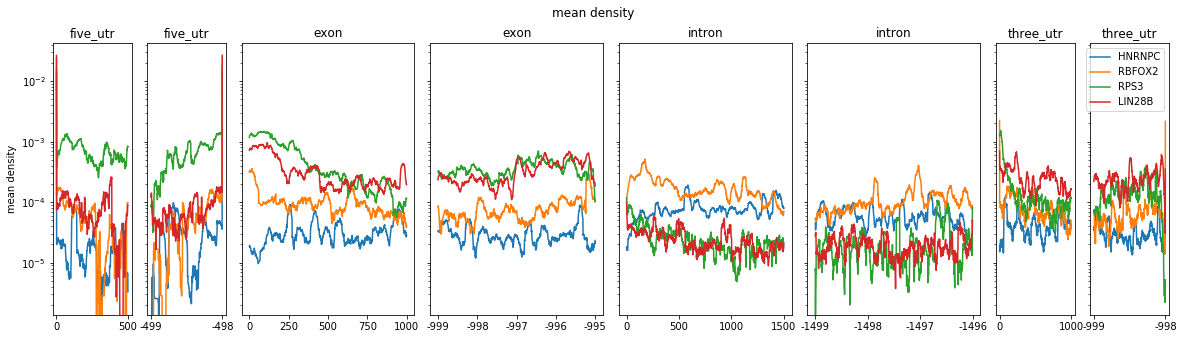

In [50]:
plot_mean_density([HNRNPC, RBFOX2, RPS3, LIN28B])

In [51]:
def plot_median_density(eCLIPs):
    ''' get a bunch of eCLIPs, plot their mean density'''
    fig2 = plt.figure(figsize = (20, 5))
    spec2 = gridspec.GridSpec(ncols=12, nrows=1, figure=fig2)
 
    # axis
    utr_five_lt = fig2.add_subplot(spec2[0, 0])
    utr_five_rt = fig2.add_subplot(spec2[0, 1], sharey = utr_five_lt)
    exon_lt = fig2.add_subplot(spec2[0, 2:4], sharey = utr_five_lt)
    exon_rt = fig2.add_subplot(spec2[0, 4:6], sharey = utr_five_lt)
    intron_lt = fig2.add_subplot(spec2[0, 6:8], sharey = utr_five_lt)
    intron_rt = fig2.add_subplot(spec2[0, 8:10], sharey = utr_five_lt)
    utr_three_lt = fig2.add_subplot(spec2[0, 10:11], sharey = utr_five_lt)
    utr_three_rt = fig2.add_subplot(spec2[0, 11:12], sharey = utr_five_lt)
    
    axes = [utr_five_lt,utr_five_rt,exon_lt,exon_rt,intron_lt,intron_rt,utr_three_lt,utr_three_rt]
    # trun off yticklabels/ xticklabels
    _ = [plt.setp(ax.get_yticklabels(), visible=False) for ax in axes[1:]]
    # set ylabel
    axes[0].set_ylabel('median density')
    #axes[0].set_yscale('log')
    
    for eCLIP in eCLIPs:
        i=0
        for feat in ['five_utr', 'exon', 'intron', 'three_utr']:
            for align in ['left', 'right']:
                md = np.nanmedian(np.concatenate([eCLIP.density_array['positive', feat,align, r] for r in ['rep1', 'rep2']], axis = 0), axis = 0)
                axes[i].plot(md, label = eCLIP.name)
                axes[i].set_title('{}'.format(feat))
                if align == 'right':
                    axes[i].set_xticks(np.arange(0, len(md), 200))
                    axes[i].set_xticklabels(np.arange(-len(md), 0, 200))
                    
                i+= 1
    plt.legend()
    plt.suptitle('median density')
    

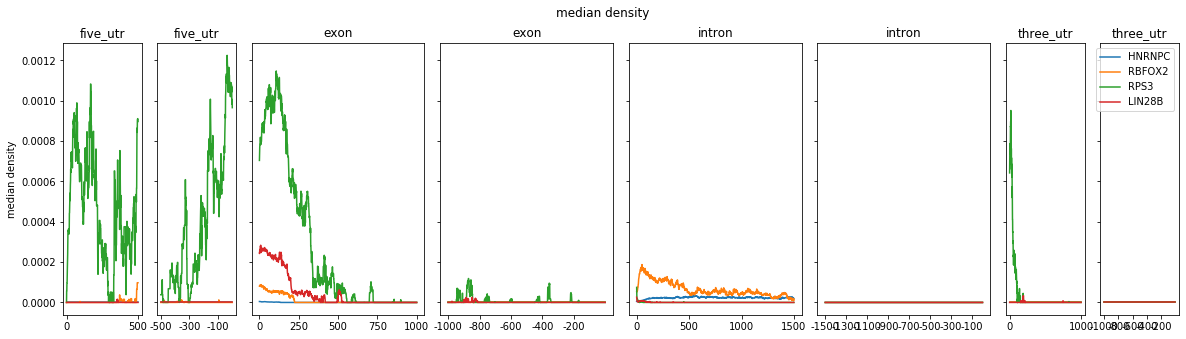

In [52]:
plot_median_density([HNRNPC, RBFOX2, RPS3, LIN28B])

In [53]:
# show that std is large
def plot_stdarea_density(eCLIPs):
    ''' get a bunch of eCLIPs, plot their mean density'''
    fig2 = plt.figure(figsize = (20, 5))
    spec2 = gridspec.GridSpec(ncols=12, nrows=1, figure=fig2)
 
    # axis
    utr_five_lt = fig2.add_subplot(spec2[0, 0])
    utr_five_rt = fig2.add_subplot(spec2[0, 1], sharey = utr_five_lt)
    exon_lt = fig2.add_subplot(spec2[0, 2:4], sharey = utr_five_lt)
    exon_rt = fig2.add_subplot(spec2[0, 4:6], sharey = utr_five_lt)
    intron_lt = fig2.add_subplot(spec2[0, 6:8], sharey = utr_five_lt)
    intron_rt = fig2.add_subplot(spec2[0, 8:10], sharey = utr_five_lt)
    utr_three_lt = fig2.add_subplot(spec2[0, 10:11], sharey = utr_five_lt)
    utr_three_rt = fig2.add_subplot(spec2[0, 11:12], sharey = utr_five_lt)
    
    axes = [utr_five_lt,utr_five_rt,exon_lt,exon_rt,intron_lt,intron_rt,utr_three_lt,utr_three_rt]
    # trun off yticklabels/ xticklabels
    _ = [plt.setp(ax.get_yticklabels(), visible=False) for ax in axes[1:]]
    # set ylabel
    axes[0].set_ylabel('median density')
    #axes[0].set_yscale('log')
    axes[0].set_ylim(ymax = 0.003, ymin = 0)
    
    for eCLIP in eCLIPs:
        i=0
        for feat in ['five_utr', 'exon', 'intron', 'three_utr']:
            for align in ['left', 'right']:
                density_concat = np.concatenate([eCLIP.density_array['positive', feat,align, r] for r in ['rep1', 'rep2']], axis = 0)
                md = np.nanmedian(density_concat, axis = 0)
                std = np.nanstd(density_concat, axis = 0)
                axes[i].plot(md, label = eCLIP.name)
                axes[i].fill_between(np.arange(len(md)), md-std, md+std, label = eCLIP.name, alpha = 0.4)
                axes[i].set_title('{}'.format(feat))
                if align == 'right':
                    axes[i].set_xticks(np.arange(0, len(md), 200))
                    axes[i].set_xticklabels(np.arange(-len(md), 0, 200))
                    
                i+= 1
    plt.legend()
    plt.suptitle('median +/- std density')
    

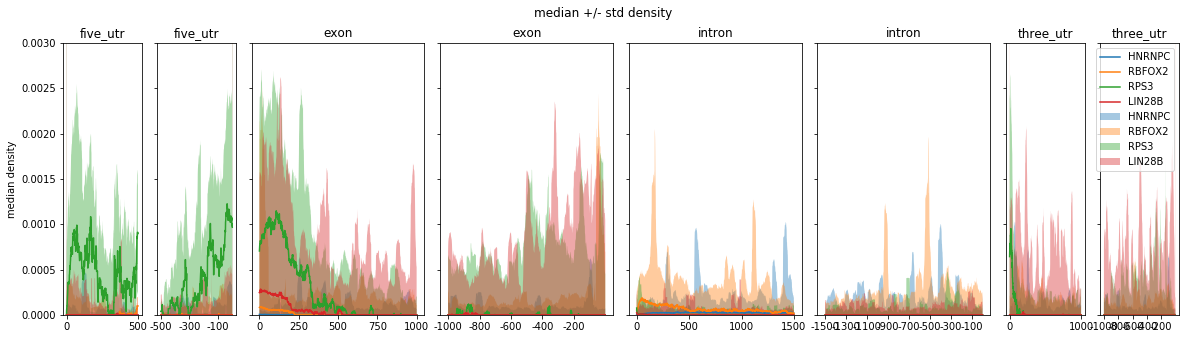

In [54]:
plot_stdarea_density([HNRNPC, RBFOX2, RPS3, LIN28B])

# Calculate relative entropy


`density_array_entropy()` does that for you

In [55]:
def plot_entropy(eCLIPs, eCLIP_probs):
    ''' get a bunch of eCLIPs, plot their mean density'''
    fig2 = plt.figure(figsize = (20, 5))
    spec2 = gridspec.GridSpec(ncols=12, nrows=1, figure=fig2)
 
    # axis
    utr_five_lt = fig2.add_subplot(spec2[0, 0],frameon=False)
    utr_five_rt = fig2.add_subplot(spec2[0, 1], sharey = utr_five_lt,frameon=False)
    exon_lt = fig2.add_subplot(spec2[0, 2:4], sharey = utr_five_lt,frameon=False)
    exon_rt = fig2.add_subplot(spec2[0, 4:6], sharey = utr_five_lt,frameon=False)
    intron_lt = fig2.add_subplot(spec2[0, 6:8], sharey = utr_five_lt,frameon=False)
    intron_rt = fig2.add_subplot(spec2[0, 8:10], sharey = utr_five_lt,frameon=False)
    utr_three_lt = fig2.add_subplot(spec2[0, 10:11], sharey = utr_five_lt,frameon=False)
    utr_three_rt = fig2.add_subplot(spec2[0, 11:12], sharey = utr_five_lt,frameon=False)
    
    axes = [utr_five_lt,utr_five_rt,exon_lt,exon_rt,intron_lt,intron_rt,utr_three_lt,utr_three_rt]
    # trun off yticklabels/ xticklabels
    _ = [plt.setp(ax.get_yticklabels(), visible=False) for ax in axes[1:]]
    # set ylabel
    axes[0].set_ylabel('relative entropy')
    #axes[0].set_yscale('log')
    
    for eCLIP, prob in zip(eCLIPs, eCLIP_probs):
        i=0
        for feat in ['five_utr', 'exon', 'intron', 'three_utr']:
            for align in ['left', 'right']:
                pos = np.mean(np.array([prob['positive', feat,align, r] for r in ['rep1', 'rep2']]), axis = 0)
                neg = np.mean(np.array([prob['negative', feat,align, r] for r in ['rep1', 'rep2']]), axis = 0)
                entro = density_array_entropy(pos, neg)
                axes[i].plot(entro, label = eCLIP.name, alpha = 0.5)
                axes[i].set_title('{}'.format(feat))
                if align == 'right':
                    axes[i].set_xticks(np.arange(0, len(entro), 200))
                    axes[i].set_xticklabels(np.arange(-len(entro), 0, 200))
                    
                i+= 1
    plt.legend()
    plt.suptitle('relative entropy: positive v.s. negative')
    

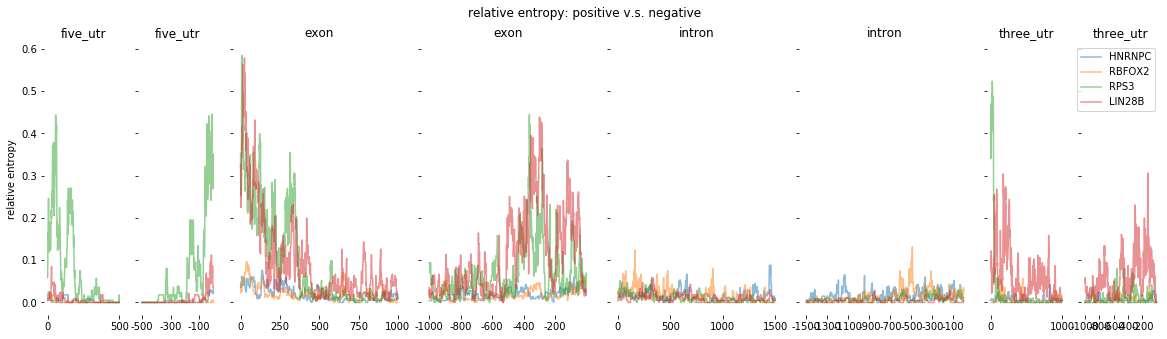

In [56]:
plot_entropy([HNRNPC, RBFOX2, RPS3, LIN28B], [HNRNPC_prob, RBFOX2_prob, RPS3_prob, LIN28B_prob])